#### K Nearest Neighbors



KNN is a supervised learning algorithm that classifies data points based on proximity assuming that similar data points are supposed to be close to each other. 

During the training phase, the algorithm picks a random point(also called the query point) and calculates the distance between the query point and the surrounding points. The distance calculation technique can be set as a model parameter in the KNeighboursClassifier instance. E.g Manhattan and Euclidean distances are the commonly used concepts to calculate the distances between 2 data points. 



<p align="center">
<img src="https://i.imgur.com/qoEBb5h.png" width="400" height="300" />
</p>


It also follows the concept of 'Lazy learning' ,i.e the algo stores the training data in memory instead of running the training stage.
The computation/training phase occurs when a prediction is being made.Since, it relies on memory to store its training data, it is also referred to as instance-based or memory-based learning method. 

##### Defining K-value:

Lower values of k can have high variance, but low bias
Larger values of k may lead to high bias and lower variance. 

Optimal Choice of K 
The choice of k: will largely depend on the input data as data with more outliers or noise will likely perform better with higher values of k. 


Import Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [24]:
diabetes_df=pd.read_csv('/users/kunalramchurn/Desktop/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


EDA

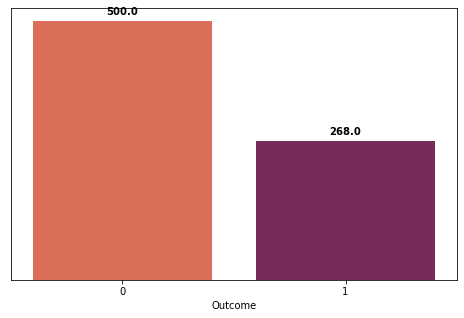

In [26]:
#close 2:1 ratio, imbalance is not a problem
plt.figure(figsize=(8,5))
ax=sns.countplot(x='Outcome',data=diabetes_df,palette='rocket_r')
diabetes_df['Outcome'].value_counts()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',weight='bold')
ax.axes.yaxis.set_visible(False)

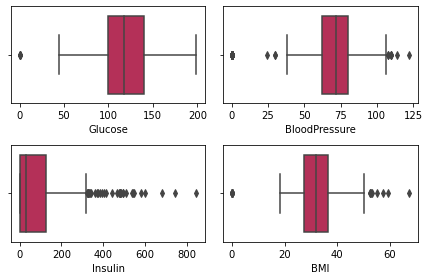

In [27]:
plt.subplot(221)
sns.boxplot('Glucose',data=diabetes_df,palette='rocket_r');
plt.subplot(222)
sns.boxplot('BloodPressure',data=diabetes_df,palette='rocket_r');
plt.subplot(223)
sns.boxplot('Insulin',data=diabetes_df,palette='rocket_r');
plt.subplot(224)
sns.boxplot('BMI',data=diabetes_df,palette='rocket_r');
plt.tight_layout()
plt.show()

##### Feature Engineering and Selection

In [28]:
from sklearn.feature_selection import SelectKBest,chi2
x_all =diabetes_df.drop('Outcome',axis=1)
y_all= diabetes_df.Outcome
chi2_features = SelectKBest(chi2, k = 4) 
X_kbest_features = chi2_features.fit_transform(x_all, y_all)
mask=chi2_features.get_support()
new_feature=[]
for bool,feature in zip(mask,x_all.columns):
  if bool:
    new_feature.append(feature)
list3=new_feature
list3

['Glucose', 'Insulin', 'BMI', 'Age']

In [39]:
df1= diabetes_df[:50]
df2=diabetes_df[50:100]

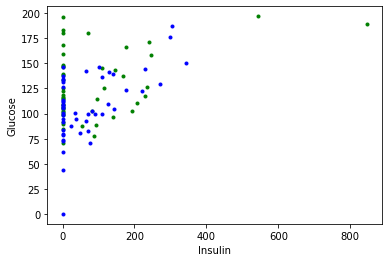

In [42]:
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.scatter(df1['Insulin'], df1['Glucose'],color="green",marker='.')
plt.scatter(df2['Insulin'], df2['Glucose'],color="blue",marker='.')

In [ ]:
#define X and y values -> perform split -> perform scaling 
X= diabetes_df[['Glucose','BMI','Age','Insulin']]
y= diabetes_df['Outcome']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [ ]:
scaler= StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

#### Model Deployment

Method 1:

In [ ]:
#Hyperparameter Tuning
param_grid = {'n_neighbors': np.arange(1,15)}
knn= KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=8)
knn_cv.fit(X_train_scaled,y_train)

print('Tuned hyperparameter {}'.format(knn_cv.best_params_))
print("Best Score:{:.2f}".format(knn_cv.best_score_))

Tuned hyperparameter {'n_neighbors': 12}
Best Score:0.76


In [ ]:
knn_new=KNeighborsClassifier(12)
knn_new.fit(X_train_scaled,y_train)
y_pred= knn_new.predict(X_test_scaled)
print('With KNN(k=12) training accuracy is:  ', round(knn_new.score(X_train_scaled,y_train)*100))
print('With KNN(k=12)  testing accuracy is:  ', round(knn_new.score(X_test_scaled,y_test)*100))

With KNN(k=12) training accuracy is:   78
With KNN(k=12)  testing accuracy is:   77


Method 2

In [ ]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train)
    
    train_scores.append(knn.score(X_train_scaled,y_train))
    test_scores.append(knn.score(X_test_scaled,y_test))
print(train_scores)
print(test_scores)

[1.0, 0.8230912476722533, 0.839851024208566, 0.7858472998137802, 0.8044692737430168, 0.7877094972067039, 0.8081936685288641, 0.8063314711359404, 0.8007448789571695, 0.7877094972067039, 0.7877094972067039, 0.7821229050279329, 0.7821229050279329, 0.7672253258845437]
[0.6883116883116883, 0.696969696969697, 0.7272727272727273, 0.7575757575757576, 0.7532467532467533, 0.7402597402597403, 0.7532467532467533, 0.7445887445887446, 0.7662337662337663, 0.7532467532467533, 0.7748917748917749, 0.7705627705627706, 0.7662337662337663, 0.7532467532467533]


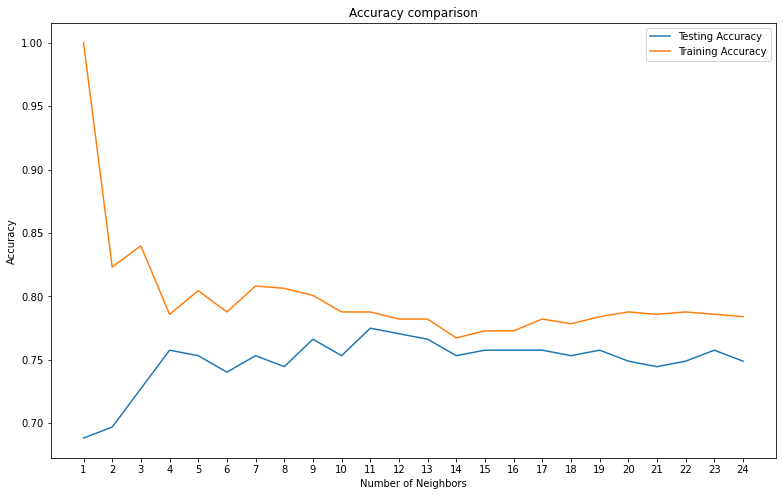

Best accuracy is 0.77 with K = 11


In [ ]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train_scaled,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train_scaled, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test_scaled, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Accuracy comparison')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {:.2f} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


Training accuracy drops after k=11,making the model more complex.

#### Model Evaluation

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       150
           1       0.75      0.52      0.61        81

    accuracy                           0.77       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.77      0.76       231



Predicted,0,1,All
True,,,
0,136,14,150
1,39,42,81
All,175,56,231


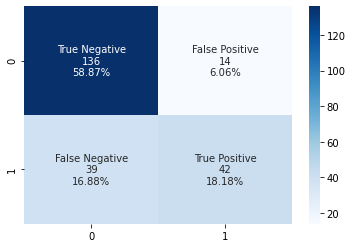

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
group_names = ['True Positive','False Positive','False Negative','True Negative']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

References:
https://www.ibm.com/topics/knn